In [ ]:
import pandas as pd
import numpy as np

# data preprocessing
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

Link dataset: https://docs.google.com/spreadsheets/d/1egzTbNaLBtxYLhoUW77DYSs_PRoaSNhKM7Om-rDWV-8/edit?usp=sharing

# Data Preprocessing

In [ ]:
url = 'https://raw.githubusercontent.com/salsabilaseptiani/Physical-Chemical-Sunscreen/main/sunscreen.csv'
sunscreen = pd.read_csv(url,encoding='unicode_escape',sep=',')

In [ ]:
# rename kolom
sunscreen = sunscreen.rename(columns={'Jenis Kelamin':'jenis_kelamin', 'Usia':'usia', 'Rata-rata durasi aktivitas di luar dalam sehari':'durasi_aktivitas', 'Jenis Kulit':'jenis_kulit', 'SPF sunscreen yang kamu pakai':'spf', 'Tekstur sunscreen yang kamu pakai':'tekstur_ss', 'Jenis sunscreen':'jenis_ss'})
sunscreen.head()

,Timestamp,jenis_kelamin,usia,durasi_aktivitas,spf,jenis_kulit,tekstur_ss,jenis_ss,Angkatan
0,24/05/2023 11:47,Perempuan,20,240,30,Berminyak,Gel,Chemical,2021
1,24/05/2023 12:02,Perempuan,20,300,30,Normal,Gel,Chemical,2021
2,24/05/2023 14:26,Perempuan,18,600,30,Kombinasi,Lotion,Chemical,2022
3,24/05/2023 16:37,Laki-Laki,19,480,30,Berminyak,Gel,Chemical,2022
4,24/05/2023 21:48,Laki-Laki,19,600,30,Normal,Cream,Chemical,2022


In [ ]:
# menghapus kolom yang tidak digunakan
kolom_hapus = ['Timestamp', 'Angkatan']
sunscreen = sunscreen.drop(kolom_hapus, axis=1)
sunscreen.head()

,jenis_kelamin,usia,durasi_aktivitas,spf,jenis_kulit,tekstur_ss,jenis_ss
0,Perempuan,20,240,30,Berminyak,Gel,Chemical
1,Perempuan,20,300,30,Normal,Gel,Chemical
2,Perempuan,18,600,30,Kombinasi,Lotion,Chemical
3,Laki-Laki,19,480,30,Berminyak,Gel,Chemical
4,Laki-Laki,19,600,30,Normal,Cream,Chemical


Menghapus variabel yang tidak dibutuhkan pada analisis yaitu Timestamp dan Angkatan

In [ ]:
sunscreen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jenis_kelamin     81 non-null     object
 1   usia              81 non-null     int64 
 2   durasi_aktivitas  81 non-null     int64 
 3   spf               81 non-null     int64 
 4   jenis_kulit       81 non-null     object
 5   tekstur_ss        81 non-null     object
 6   jenis_ss          81 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.6+ KB


In [ ]:
# memisahkan variabel kategorik dan numerik
cat = ['jenis_kelamin', 'jenis_kulit', 'tekstur_ss', 'jenis_ss']
num = ['usia', 'durasi_aktivitas', 'spf']

In [ ]:
sunscreen[num].describe()

,usia,durasi_aktivitas,spf
count,81.000000,81.000000,81.000000
mean,19.358025,843.197531,46.049383
std,1.217668,4770.225457,8.430453
min,12.000000,10.000000,30.000000
25%,19.000000,150.000000,45.000000
50%,19.000000,300.000000,50.000000
75%,20.000000,480.000000,50.000000
max,21.000000,43200.000000,90.000000


- Rata-rata usia responden pada penelitian ini berada pada usia 19 tahun.
- Usia minimal responden pada penelitian ini berada pada usia 12 tahun.
- Usia maksimal responden pada penelitian ini berada pada usia 21 tahun.
- Rata-rata durasi aktivitas diluar ruangan pada siang hari adalah 843,197 menit
- Minimal durasi aktivitas diluar ruangan pada siang hari adalah 10 menit.
- Maksimal durasi aktivitas diluar ruangan pada siang hari adalah 43200 menit.
- Rata-rata SPF pada sunscreen yang digunakan responden adalah SPF 46.
- Minimal SPF pada sunscreen adalah SPF 30.
- Maksimal SPF pada sunscreen adalah SPF 90.

In [ ]:
sunscreen[cat].describe()

,jenis_kelamin,jenis_kulit,tekstur_ss,jenis_ss
count,81,81,81,81
unique,2,5,4,2
top,Perempuan,Berminyak,Lotion,Chemical
freq,66,24,35,47


Berdasarkan hasil deskripsi diatas,didapatkan jenis kelamin reponden pada penelitian ini adalah perempuan dengan jumlah sebanyak 66, jenis kulit terbanyak adalah berminyak dengan
jumlah 24 reponden, tekstur sunscreen terbanyak adalah lotion dengan jumlah 35
responden, dan jenis sunscreen terbanyak yaitu chemical dengan jumlah 47 reponden

## Check & Handling Outliers

In [ ]:
# fungsi mencari outlier
def find_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# fungsi menghapus outlier
def remove_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = np.where(z_scores > threshold)[0]
    cleaned_data = data.drop(data.index[outliers])
    return cleaned_data

In [ ]:
# mencari outlier variabel usia
outlier_usia = find_outliers_zscore(sunscreen, 'usia')
print(outlier_usia)

   jenis_kelamin  usia  durasi_aktivitas  spf jenis_kulit tekstur_ss  jenis_ss
13     Perempuan    12               420   40   Berminyak     Lotion  Chemical


In [ ]:
# menghapus outlier variabel usia
cleaned_df = remove_outliers_zscore(sunscreen, 'usia')
len(cleaned_df)

80

In [ ]:
# mencari outlier variabel usia
outlier_usia = find_outliers_zscore(cleaned_df, 'usia')
print(outlier_usia)

Empty DataFrame
Columns: [jenis_kelamin, usia, durasi_aktivitas, spf, jenis_kulit, tekstur_ss, jenis_ss]
Index: []


Pada atribut usia, ditemukan outlier yaitu data dengan usia 12 tahun. Dikatakan sebagai outlier karena target responden penelitian ini adalah mahasiswa Teknologi Sains Data. Outlier tersebut terjadi karena ada kemungkinan kesalahan saat pengisian kuisioner, jadi data outlier tersebut akan dihapus.

In [ ]:
# mencari outlier variabel durasi_aktivitas
outlier_durasi_aktivitas = find_outliers_zscore(cleaned_df, 'durasi_aktivitas')
print(outlier_durasi_aktivitas)

   jenis_kelamin  usia  durasi_aktivitas  spf jenis_kulit tekstur_ss  jenis_ss
35     Perempuan    20             43200   50      Kering     Lotion  Physical


In [ ]:
# menghapus outlier variabel durasi_aktivitas
cleaned_df1 = remove_outliers_zscore(cleaned_df, 'durasi_aktivitas')
len(cleaned_df1)

79

In [ ]:
# mencari outlier variabel durasi_aktivitas
outlier_durasi_aktivitas1 = find_outliers_zscore(cleaned_df1, 'durasi_aktivitas')
print(outlier_durasi_aktivitas1)

   jenis_kelamin  usia  durasi_aktivitas  spf jenis_kulit tekstur_ss  jenis_ss
70     Laki-Laki    20              1440   50   Berminyak      Cream  Physical


In [ ]:
# menghapus outlier variabel durasi_aktivitas
cleaned_df2 = remove_outliers_zscore(cleaned_df1, 'durasi_aktivitas')
len(cleaned_df2)

78

In [ ]:
# mencari outlier variabel durasi_aktivitas
outlier_durasi_aktivitas1 = find_outliers_zscore(cleaned_df2, 'durasi_aktivitas')
print(outlier_durasi_aktivitas1)

Empty DataFrame
Columns: [jenis_kelamin, usia, durasi_aktivitas, spf, jenis_kulit, tekstur_ss, jenis_ss]
Index: []


Pada atribut durasi_aktivitas ditemukan outliers yaitu data dengan nilai 43200 menit (720 jam) dan 1440 menit (24 jam). Data tersebut akan dihapus karena dianggap tidak masuk akal jika seseorang berada di luar ruangan pada siang hari selama 720 jam dan 24 jam, hal tersebut dapat memengaruhi hasil analisis yang dilakukan.

In [ ]:
# mencari outlier variabel spf
outlier_spf = find_outliers_zscore(cleaned_df2, 'spf')
print(outlier_spf)

   jenis_kelamin  usia  durasi_aktivitas  spf jenis_kulit tekstur_ss  jenis_ss
56     Perempuan    18                30   90   Berminyak        Gel  Chemical


In [ ]:
# menghapus outlier variabel spf
cleaned_df3 = remove_outliers_zscore(cleaned_df2, 'spf')
len(cleaned_df3)

77

In [ ]:
# mencari outlier variabel spf
outlier_spf = find_outliers_zscore(cleaned_df3, 'spf')
print(outlier_spf)

Empty DataFrame
Columns: [jenis_kelamin, usia, durasi_aktivitas, spf, jenis_kulit, tekstur_ss, jenis_ss]
Index: []


Pada atribut spf ditemukan outlier yaitu data dengan nilai 90. Data tersebut dikatakan outlier karena saat ini SPF 50 masih menjadi salah satu kandungan SPF sunscreen tertinggi di Indonesia (BeautyHaul, 2022).

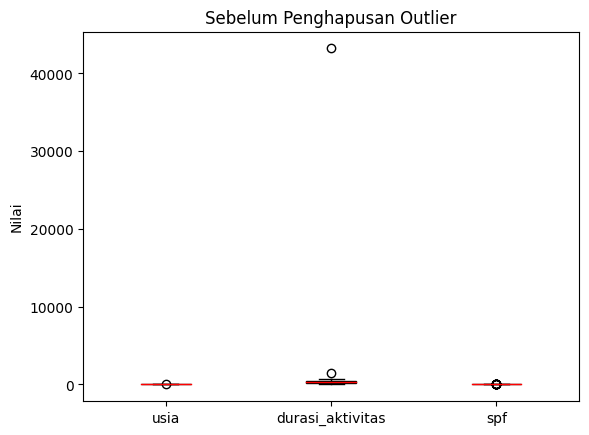

In [ ]:
# Membuat figure dan axis
fig, ax = plt.subplots()

# Menetapkan warna boxplot
boxplot = ax.boxplot([sunscreen[col] for col in num], patch_artist=True)

# Mengatur warna boxplot
colors = ['#ff39aa', '#bdff00', '#c97dff']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Menetapkan label tick pada sumbu x
ax.set_xticklabels(num)

# Menetapkan label pada sumbu y
ax.set_ylabel('Nilai')

# Menetapkan judul plot
ax.set_title('Sebelum Penghapusan Outlier')

# Mengganti warna garis median pada boxplot
for line in boxplot['medians']:
    line.set_color('red')

# Menampilkan plot
plt.show()

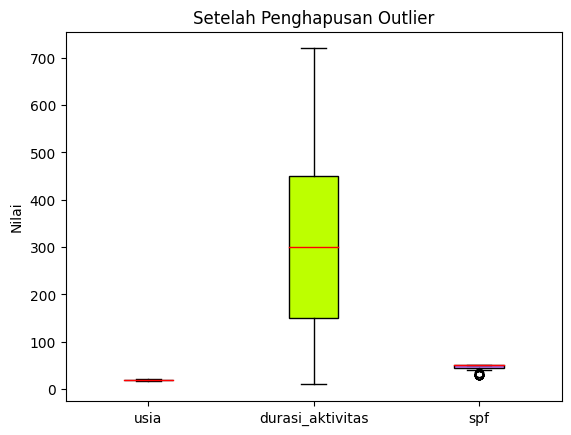

In [ ]:
# Membuat figure dan axis
fig, ax = plt.subplots()

# Menetapkan warna boxplot
boxplot = ax.boxplot([cleaned_df3[col] for col in num], patch_artist=True)

# Mengatur warna boxplot
colors = ['#ff39aa', '#bdff00', '#c97dff']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Menetapkan label tick pada sumbu x
ax.set_xticklabels(num)

# Menetapkan label pada sumbu y
ax.set_ylabel('Nilai')

# Menetapkan judul plot
ax.set_title('Setelah Penghapusan Outlier')

# Mengganti warna garis median pada boxplot
for line in boxplot['medians']:
    line.set_color('red')

# Menampilkan plot
plt.show()

## Normalization

In [ ]:
# normalisasi Standard Scaler
scaler = StandardScaler()
cleaned_df3[num] = scaler.fit_transform(cleaned_df3[num])
cleaned_df3

,jenis_kelamin,usia,durasi_aktivitas,spf,jenis_kulit,tekstur_ss,jenis_ss
0,Perempuan,0.612372,-0.340355,-2.241894,Berminyak,Gel,Chemical
1,Perempuan,0.612372,-0.007845,-2.241894,Normal,Gel,Chemical
2,Perempuan,-1.632993,1.654706,-2.241894,Kombinasi,Lotion,Chemical
3,Laki-Laki,-0.510310,0.989686,-2.241894,Berminyak,Gel,Chemical
4,Laki-Laki,-0.510310,1.654706,-2.241894,Normal,Cream,Chemical
...,...,...,...,...,...,...,...
76,Perempuan,0.612372,-1.116212,-0.065938,Kombinasi,Gel,Chemical
77,Laki-Laki,0.612372,0.324665,0.659380,Normal,Lotion,Physical
78,Perempuan,-0.510310,1.654706,0.659380,Sensitif,Lotion,Chemical
79,Perempuan,-0.510310,-0.340355,-2.241894,Kombinasi,Cream,Physical


Dilakukan normalisasi pada tahap ini yaitu normalisasi skala untuk mengubah skala data menjadi rentang yang sama agar hasil analisis ini tidak bias.

## Feature Encoding

In [ ]:
# melakukan one-hot encoding pada setiap variabel kategorikal
ss_final = cleaned_df3
for var in cat:
    encoded_features = pd.get_dummies(ss_final[var], prefix=var)
    ss_final = pd.concat([ss_final, encoded_features], axis=1)
    ss_final.drop(var, axis=1, inplace=True)

# menggabungkan kolom "jenis_ss_Chemical" dan "jenis_ss_Physical" menjadi satu kolom "jenis_ss"
ss_final['jenis_ss'] = ss_final['jenis_ss_Chemical'].apply(lambda x: 1 if x == 1 else 0)

# menghapus kolom "jenis_ss_Chemical" dan "jenis_ss_Physical"
ss_final.drop(['jenis_ss_Chemical', 'jenis_ss_Physical'], axis=1, inplace=True)

# chemical = 1, physical = 0
ss_final

,usia,durasi_aktivitas,spf,jenis_kelamin_Laki-Laki,jenis_kelamin_Perempuan,jenis_kulit_Berminyak,jenis_kulit_Kering,jenis_kulit_Kombinasi,jenis_kulit_Normal,jenis_kulit_Sensitif,tekstur_ss_Cream,tekstur_ss_Gel,tekstur_ss_Lotion,tekstur_ss_Spray,jenis_ss
0,0.612372,-0.340355,-2.241894,0,1,1,0,0,0,0,0,1,0,0,1
1,0.612372,-0.007845,-2.241894,0,1,0,0,0,1,0,0,1,0,0,1
2,-1.632993,1.654706,-2.241894,0,1,0,0,1,0,0,0,0,1,0,1
3,-0.510310,0.989686,-2.241894,1,0,1,0,0,0,0,0,1,0,0,1
4,-0.510310,1.654706,-2.241894,1,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.612372,-1.116212,-0.065938,0,1,0,0,1,0,0,0,1,0,0,1
77,0.612372,0.324665,0.659380,1,0,0,0,0,1,0,0,0,1,0,0
78,-0.510310,1.654706,0.659380,0,1,0,0,0,0,1,0,0,1,0,1
79,-0.510310,-0.340355,-2.241894,0,1,0,0,1,0,0,1,0,0,0,0


## Check Imbalance Data

In [ ]:
# imbalance
counts_before = ss_final['jenis_ss'].value_counts()
print(counts_before)

1    45
0    32
Name: jenis_ss, dtype: int64


Dari proses pengecekan imbalance data, terlihat bahwa responden yang menggunakan sunscreen jenis chemical (1) sebanyak 45 responden atau sebesar 58% dan sunscreen jenis physical (0) sebanyak 32 responden atau sebesar 42%. Jumlah responden dari masing-masing kategori tidak menunjukkan adanya perbedaan yang terlalu signifikan antar kelas atau kategori, sehingga bisa disimpulkan tidak terjadi imbalance data pada dataset yang digunakan.

# Data Visualization

## Sebelum Data Preprocessing

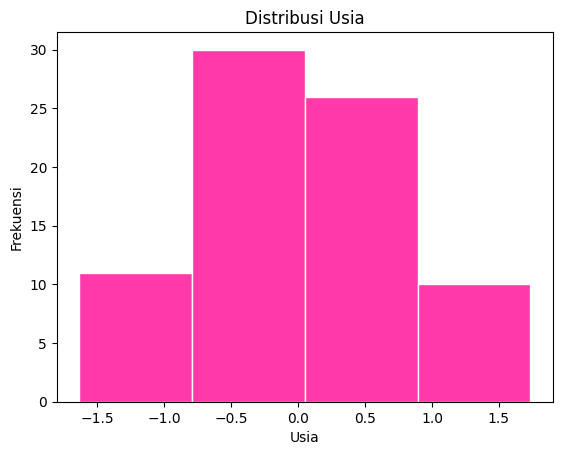

In [ ]:
# histogram usia
plt.hist(cleaned_df3['usia'], bins=4, edgecolor='white', color='#ff39aa')

# label pada sumbu x dan y
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# judul
plt.title('Distribusi Usia')

# menampilkan plot
plt.show()

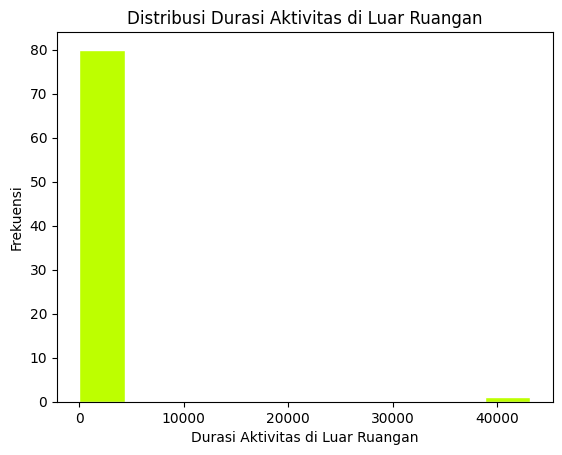

In [ ]:
# histogram durasi aktivitas
plt.hist(sunscreen['durasi_aktivitas'], bins=10, edgecolor='white', color='#bdff00')

# label pada sumbu x dan y
plt.xlabel('Durasi Aktivitas di Luar Ruangan')
plt.ylabel('Frekuensi')

# judul
plt.title('Distribusi Durasi Aktivitas di Luar Ruangan')

# menampilkan plot
plt.show()

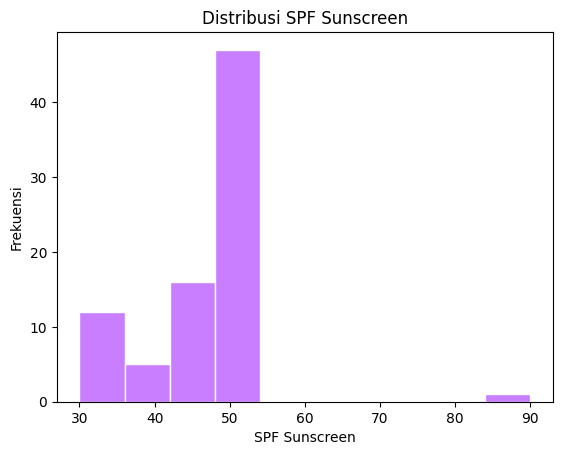

In [ ]:
# histogram spf
plt.hist(sunscreen['spf'], bins=10, edgecolor='white', color='#c97dff')

# label pada sumbu x dan y
plt.xlabel('SPF Sunscreen')
plt.ylabel('Frekuensi')

# judul
plt.title('Distribusi SPF Sunscreen')

# menampilkan plot
plt.show()

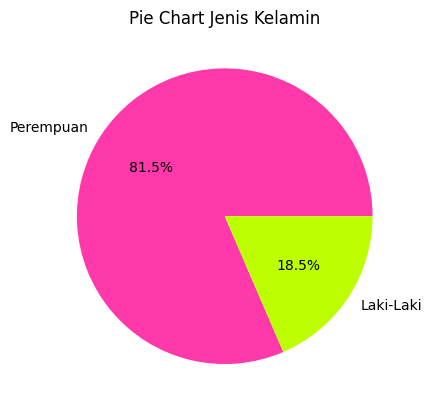

In [ ]:
# pie chart jenis kelamin
# menghitung frekuensi masing-masing kategori
counts_jenis_kelamin = sunscreen['jenis_kelamin'].value_counts()

# mengambil kategori dan persentase
cat_jenis_kelamin = counts_jenis_kelamin.index
percent_jenis_kelamin = (counts_jenis_kelamin / len(sunscreen)) * 100

# warna pie chart
warna = ['#ff39aa', '#bdff00']

# membuat pie chart
plt.pie(percent_jenis_kelamin, labels=cat_jenis_kelamin, autopct='%1.1f%%', colors=warna)

# judul
plt.title('Pie Chart Jenis Kelamin')

# Menampilkan plot
plt.show()

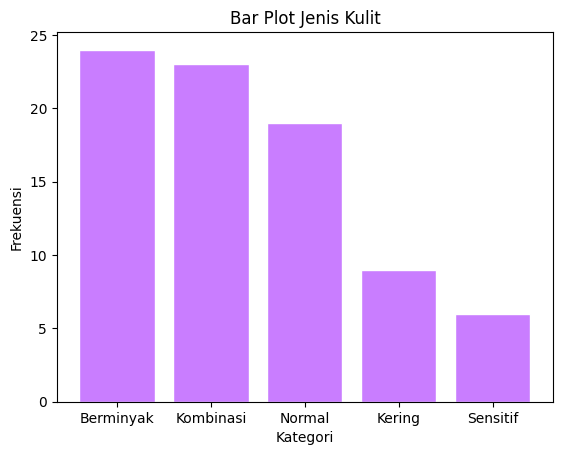

In [ ]:
# bar plot jenis kulit
# menghitung frekuensi masing-masing kategori
counts_jenis_kulit = sunscreen['jenis_kulit'].value_counts()

# mengambil kategori dan frekuensi
cat_jenis_kulit = counts_jenis_kulit.index
freq_jenis_kulit = counts_jenis_kulit.values

# membuat bar plot
plt.bar(cat_jenis_kulit, freq_jenis_kulit, edgecolor='white', color='#c97dff')

# label pada sumbu x dan y
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')

# judul
plt.title('Bar Plot Jenis Kulit')

# Menampilkan plot
plt.show()

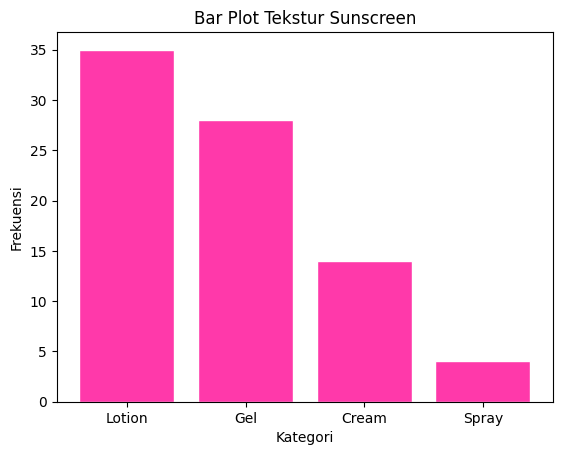

In [ ]:
# bar plot tekstur sunscreen
# menghitung frekuensi masing-masing kategori
counts_tekstur_ss = sunscreen['tekstur_ss'].value_counts()

# mengambil kategori dan frekuensi
cat_tekstur_ss = counts_tekstur_ss.index
freq_tekstur_ss = counts_tekstur_ss.values

# membuat bar plot
plt.bar(cat_tekstur_ss, freq_tekstur_ss, edgecolor='white', color='#ff39aa')

# label pada sumbu x dan y
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')

# judul
plt.title('Bar Plot Tekstur Sunscreen')

# Menampilkan plot
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa tekstur sunscreen yang serng dipakai mahasiswa TSD berdasarkan survey adalah tekstur lotion, dilanjutkan dengan tekstur Gel, Cream, dan Spray

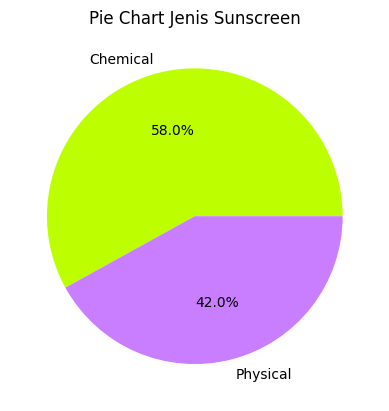

In [ ]:
# pie chart jenis sunscreen
# menghitung frekuensi masing-masing kategori
counts_jenis_ss = sunscreen['jenis_ss'].value_counts()

# mengambil kategori dan persentase
cat_jenis_ss = counts_jenis_ss.index
percent_jenis_ss = (counts_jenis_ss / len(sunscreen)) * 100

# warna pie chart
warna = ['#bdff00', '#c97dff']

# membuat pie chart
plt.pie(percent_jenis_ss, labels=cat_jenis_ss, autopct='%1.1f%%', colors=warna)

# judul
plt.title('Pie Chart Jenis Sunscreen')

# Menampilkan plot
plt.show()

Dari hasil survey preferensi skincare mahasiswa TSD didapatkan 58% mahasiswa TSD menggunakan sunscreen dengan jenis chemical, dan 42% sisanya menggunakan sunscreen dengan jenis physical

## Setelah Data Preprocessing

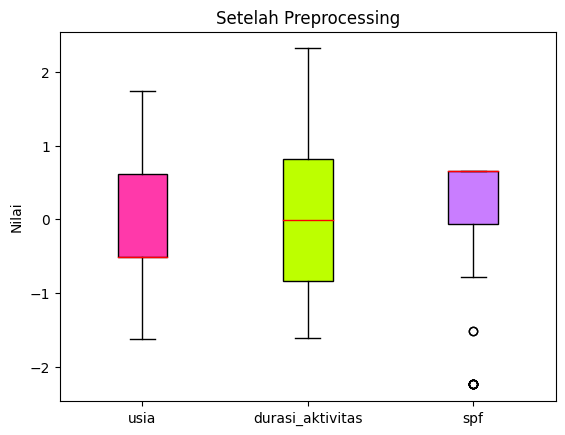

In [ ]:
# Membuat figure dan axis
fig, ax = plt.subplots()

# Menetapkan warna boxplot
boxplot = ax.boxplot([ss_final[col] for col in num], patch_artist=True)

# Mengatur warna boxplot
colors = ['#ff39aa', '#bdff00', '#c97dff']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Menetapkan label tick pada sumbu x
ax.set_xticklabels(num)

# Menetapkan label pada sumbu y
ax.set_ylabel('Nilai')

# Menetapkan judul plot
ax.set_title('Setelah Preprocessing')

# Mengganti warna garis median pada boxplot
for line in boxplot['medians']:
    line.set_color('red')

# Menampilkan plot
plt.show()

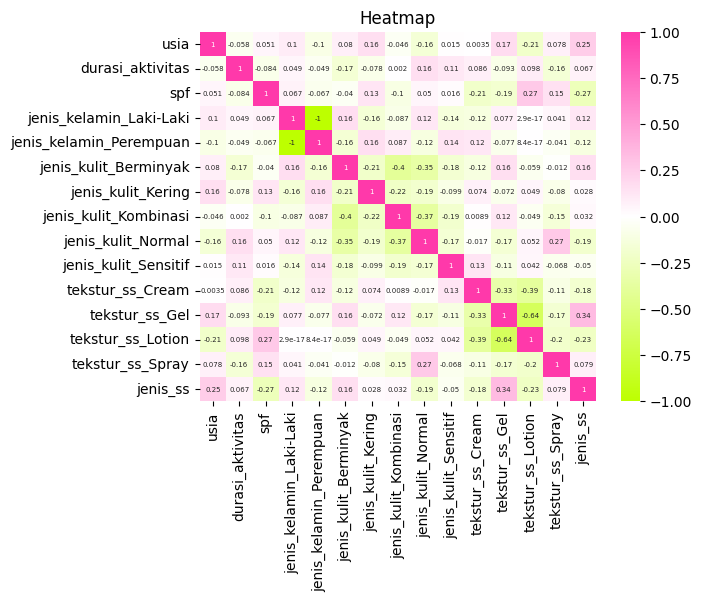

In [ ]:
# heatmap
# warna
colors = [(0, '#bdff00'), (0.5, '#FFF'), (1, '#ff39aa')]
cmap_custom = LinearSegmentedColormap.from_list('custom_cmap', colors)

# membuat heatmap
heatmap = sns.heatmap(ss_final.corr(), annot=True, cmap=cmap_custom, annot_kws={'fontsize': 5})

# judul
heatmap.set_title('Heatmap')

# menampilkan heatmap
plt.show()

Dari visualisasi di atas, bisa dilihat bahwa atribut X dan y yang memiliki korelasi positif tertinggi adalah atribut tekstur_ss_gel (X) dengan jenis_ss (y) yaitu sebesar 0,34 dan juga korelasi positif terendah adalah atribut jenis_kulit_kering (X) dengan jenis_ss (y) yaitu sebesar 0,028. Sedangkan untuk korelasi negatif tertinggi terjadi antara atribut spf (X) dan atribut jenis_ss (y) yaitu sebesar -0,27 serta korelasi negatif terendah terjadi antara atribut jenis_kulit_sensitif (X) dan atribut jenis_ss (y) yaitu sebesar -0,05. Dari heatmap di atas juga dapat disimpulkan sebagai berikut.
- Individu yang memilih tekstur sunscreen gel akan cenderung memilih jenis_ss chemical.
- Individu yang memiliki jenis kulit kering akan cenderung memilih jenis_ss chemical.
- Individu yang memiliki jenis kulit sensitif akan cenderung memilih jenis_ss physical.
- Semakin tinggi tingkat SPF yang dibutuhkan individu, maka akan cenderung memilih jenis_ss physical.

# Classification

In [ ]:
X = ss_final.drop(['jenis_ss'], axis  = 1)
X

,usia,durasi_aktivitas,spf,jenis_kelamin_Laki-Laki,jenis_kelamin_Perempuan,jenis_kulit_Berminyak,jenis_kulit_Kering,jenis_kulit_Kombinasi,jenis_kulit_Normal,jenis_kulit_Sensitif,tekstur_ss_Cream,tekstur_ss_Gel,tekstur_ss_Lotion,tekstur_ss_Spray
0,0.612372,-0.340355,-2.241894,0,1,1,0,0,0,0,0,1,0,0
1,0.612372,-0.007845,-2.241894,0,1,0,0,0,1,0,0,1,0,0
2,-1.632993,1.654706,-2.241894,0,1,0,0,1,0,0,0,0,1,0
3,-0.510310,0.989686,-2.241894,1,0,1,0,0,0,0,0,1,0,0
4,-0.510310,1.654706,-2.241894,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.612372,-1.116212,-0.065938,0,1,0,0,1,0,0,0,1,0,0
77,0.612372,0.324665,0.659380,1,0,0,0,0,1,0,0,0,1,0
78,-0.510310,1.654706,0.659380,0,1,0,0,0,0,1,0,0,1,0
79,-0.510310,-0.340355,-2.241894,0,1,0,0,1,0,0,1,0,0,0


Mendefinisikan nilai X yang didapatkan dari beberapa atribut independent, seperti usia, durasi aktivitas, spf, encoding dari jenis kelamin, encoding dari jenis kulit, dan encoding dari tekstur sunscreen

In [ ]:
y = ss_final.jenis_ss
y

0     1
1     1
2     1
3     1
4     1
     ..
76    1
77    0
78    1
79    0
80    0
Name: jenis_ss, Length: 77, dtype: int64

Mendefinisikan variabel y yang berasal dari atribut dependen yatu jenis sunscreen yang berisikan: 0 jenis sunscreen chemical, dan 1 jenis sunscreen physical

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Melakukan train split test untuk membagi data menjadi data train dan data test. diguanakan rasio 80:20 dimana 80% untuk data train dan 20% untuk data test

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Dalam pembuatan model svm digunakan function RandomForestClassifier() yang didapatkan dari library sklearn.ensemble. Membangun model dengan memasukan data train kedalam model Random Forest.

In [ ]:
y_rf_pred = rf.predict(X_test)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_rf_pred})
evaluate

,y_test,y_pred
50,1,1
78,1,0
62,1,1
57,1,1
36,1,1
27,1,1
72,1,0
34,0,0
47,0,1
73,0,0


dilakukan comparison antara hasil dari y_predict dan y_test. apakah sesuai atau tidak. maksudnya, apakah jenis sunscreen yang dikategorikan sebagai chemical benar-benar berjenis chemical? begitu juga sebaliknya.

Dari hasil analisa tersebut didapatkan terlihat ada beberapa hasil prediksi jenis sunscreen yang tidak sesuai dengan hasil test jenis sunscreen.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_rf_pred)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[4 1]
 [3 8]]


**True Negative** merupakan jumlah data yang diklasifikasikan dengan benar sebagai kelas jenis sunscreen chemical, dengan TN sebanyak 4

**False Positive** merupakan jumlah data yang seharusnya diklasifikasikan sebagai kelas jenis sunscreen chemical namun salah diklasifikasikan sebagai kelas jenis sunscreen physical, dengan FP sebanyak 1

**False Negative** merupakan jumlah data yang seharusnya diklasifikasikan sebagai kelas jenis sunscreen physical namun salah diklasifikasikan sebagai kelas jenis sunscreen chemical, dengan FN sebanyak 3

**True Positive** merupakan jumlah data yang diklasifikasikan dengan benar sebagai kelas jenis sunscreen physical, dengan TP sebanyak 8

**True Negative** merupakan jumlah data yang diklasifikasikan dengan benar sebagai kelas jenis sunscreen chemical, dengan TN sebanyak 4

**False Positive** merupakan jumlah data yang seharusnya diklasifikasikan sebagai kelas jenis sunscreen chemical namun salah diklasifikasikan sebagai kelas jenis sunscreen physical, dengan FP sebanyak 1

**False Negative** merupakan jumlah data yang seharusnya diklasifikasikan sebagai kelas jenis sunscreen physical namun salah diklasifikasikan sebagai kelas jenis sunscreen chemical, dengan FN sebanyak 3

**True Positive** merupakan jumlah data yang diklasifikasikan dengan benar sebagai kelas jenis sunscreen physical, dengan TP sebanyak 8

In [ ]:
# evaluasi model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Menghitung presisi, recall
precision = precision_score(y_test, y_rf_pred)
recall = recall_score(y_test, y_rf_pred)
f1 = f1_score(y_test, y_rf_pred)
accuracy_rf = accuracy_score(y_test, y_rf_pred)

result = pd.DataFrame({'Precision': [precision], 'Recall': [recall], 'f1-Score': [f1], 'Accuracy Score': [accuracy_rf]})
result

,Precision,Recall,f1-Score,Accuracy Score
0,0.888889,0.727273,0.8,0.75


untuk mendapatkan nilai dari evaluasi model (metrics) digunakan function precision_score(), recall_score(), f1_score(), dan accuracy_score() yang didapatkan dari library sklearn.metrics

- Precision adalah rasio jumlah data positif yang diklasifikasikan dengan benar oleh model terhadap total data yang diklasifikasikan sebagai positif. Precision mengukur seberapa akurat model dalam mengidentifikasi data positif.

- Recall adalah rasio jumlah data positif yang diklasifikasikan dengan benar oleh model terhadap total data positif yang ada. Recall mengukur seberapa baik model dalam mengenali data positif.

- f1-score adalah nilai rata-rata harmonis antara presisi dan recall. Metrik ini memberikan keseimbangan antara presisi dan recall.

- Accuracy adalah rasio jumlah data yang diklasifikasikan dengan benar oleh model terhadap total jumlah data yang ada. Accuracy mengukur seberapa sering model benar dalam memprediksi kelas target

- Dari hasil evaluasi model diatas didapatkan hasil untuk precision sebesar 88.89%, recall sebesar 72.72%, dan f1-score sebesar 80%, dan akurasi model sebesar 75%


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

Dalam pembuatan model svm digunakan function SVC() yang didapatkan dari library sklearn.svm. Membangun model dengan memasukan data train kedalam model SVM.

In [ ]:
y_svm_pred = svm.predict(X_test)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_svm_pred})
evaluate

,y_test,y_pred
50,1,1
78,1,0
62,1,1
57,1,1
36,1,1
27,1,1
72,1,1
34,0,0
47,0,1
73,0,0


dilakukan comparison antara hasil dari y_predict dan y_test. apakah sesuai atau tidak. maksudnya, apakah jenis sunscreen yang dikategorikan sebagai chemical benar-benar berjenis chemical? begitu juga sebaliknya.

Dari hasil analisa tersebut didapatkan terlihat ada beberapa hasil prediksi jenis sunscreen yang tidak sesuai dengan hasil test jenis sunscreen.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_svm_pred)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[ 3  2]
 [ 1 10]]


**True Negative** merupakan jumlah data yang diklasifikasikan dengan benar sebagai kelas jenis sunscreen chemical, dengan TN sebanyak 3

**False Positive** merupakan jumlah data yang seharusnya diklasifikasikan sebagai kelas jenis sunscreen chemical namun salah diklasifikasikan sebagai kelas jenis sunscreen physical, dengan FP sebanyak 2

**False Negative** merupakan jumlah data yang seharusnya diklasifikasikan sebagai kelas jenis sunscreen physical namun salah diklasifikasikan sebagai kelas jenis sunscreen chemical, dengan FN sebanyak 1

**True Positive** merupakan jumlah data yang diklasifikasikan dengan benar sebagai kelas jenis sunscreen physical, dengan TP sebanyak 10

In [ ]:
# evaluasi model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Menghitung presisi, recall
precision = precision_score(y_test, y_svm_pred)
recall = recall_score(y_test, y_svm_pred)
f1 = f1_score(y_test, y_svm_pred)
accuracy_svm = accuracy_score(y_test, y_svm_pred)

result = pd.DataFrame({'Precision': [precision], 'Recall': [recall], 'f1-Score': [f1], 'Accuracy Score': [accuracy_svm]})
result

,Precision,Recall,f1-Score,Accuracy Score
0,0.833333,0.909091,0.869565,0.8125


untuk mendapatkan nilai dari evaluasi model (metrics) digunakan function precision_score(), recall_score(), f1_score(), dan accuracy_score() yang didapatkan dari library sklearn.metrics

- Precision adalah rasio jumlah data positif yang diklasifikasikan dengan benar oleh model terhadap total data yang diklasifikasikan sebagai positif. Precision mengukur seberapa akurat model dalam mengidentifikasi data positif.

- Recall adalah rasio jumlah data positif yang diklasifikasikan dengan benar oleh model terhadap total data positif yang ada. Recall mengukur seberapa baik model dalam mengenali data positif.

- f1-score adalah nilai rata-rata harmonis antara presisi dan recall. Metrik ini memberikan keseimbangan antara presisi dan recall.

- Accuracy adalah rasio jumlah data yang diklasifikasikan dengan benar oleh model terhadap total jumlah data yang ada. Accuracy mengukur seberapa sering model benar dalam memprediksi kelas target

- Dari hasil evaluasi model diatas didapatkan hasil untuk precision sebesar 83.33%, recall sebesar 90.91%, dan f1-score sebesar 86.96%, dan akurasi model sebesar 81,25%


# Perbandingan ACCURACY

In [ ]:
klasifikasi = pd.DataFrame({'Accuracy RF': [accuracy_rf],
                            'Accuracy SVM': [accuracy_svm]})
klasifikasi

,Accuracy RF,Accuracy SVM
0,0.75,0.8125


Setelah dilakukan analisis klasifikasi dengan menggunakan Random Forest dan Support Vector Machine didapatkan bahwa SVM cenderung kebih unggul jika dibandingkan dengan Random Forest dimana akurasi yang didapatkan dengan model SVM mencapai 81.25%, sedangkan akurasi yang didapatkan model Random Forest mencapai 75%.

Kami menduga alasan mengapa model SVM memiliki akurasi yang lebih unggul dibandingkan dengan Random Forest, diantaranya:
- Data yang kami gunakan untuk penelitian kali ini adalah data dengan jumlah relatif kecil jika dibandingkan dengan penelitian-penelitian lain. Metode SVM cukup baik untuk menangani dataset dengan ukuran yang relatif kecil.
- Proses Prepocessing. Metode SVM cenderung sensitif terhadap skala fitur, sehingga perlu dilakukan normalisasi. pada analisa kami, kami juga melakukan normalisasi sehingga memenuhi kriteria model SVM.
- Karakteristik data SVM. Metode SVM memiliki keungguluan dalam menangani data dengan fitur yang kompleks. Kami menduga bahwa dataset kami memiliki fitur yang kompleks sehingga memenuhi untuk dilakukan klasifikasi dengan menggunakan Support Vector Machine (SVM)

Oleh karena itu, disarankan jika ingin mengetahui jenis sunscreen apa yang baik digunakan sesuai dengan permasalahan kulitnya bisa digunakan model SVM.